In [1]:
import sys
sys.path.append("../") # go to parent dir

from pathlib2 import Path

import random
from load_data import load_data
from distance import total_variation_distance
from test_instances.ts_test import TSTest
from test_instances.fair_sd_ts_test import FairSDTest
from test_instances.sd_ts_test import SDTest
import numpy as np
import pickle


import os
import plot.plot_data_seperated as plt_sep

import matplotlib.pyplot as plt
T=5000
n_iter=500.

def plot_all(test_cases):
    plt_sep.plot_delta_subjective_fair(test_cases)
    plt_sep.plot_subjective_min_e1(test_cases)
    plt_sep.plot_delta_smooth_fair(test_cases)
    plt_sep.plot_min_e1(test_cases)
    plt_sep.plot_average_total_regret(test_cases)
    plt_sep.plot_fairness_regret(test_cases)


def save_plot(name):
    i = 0
    name = 'fin_sep_data_' + name
    name_i = name + '_' + format(i) + '.png'
    while Path('/Users/antonm/Desktop/BachelorThesis/Plots/'+name_i).exists():
        i += 1
        name_i = name + '_' + format(i) + '.png'
    plt.savefig('/Users/antonm/Desktop/BachelorThesis/Plots/'+ name_i, bbox_inches='tight')


In [17]:

def plot_min_e1(test_cases):
    T = test_cases[0].T
    x = range(T)

    for test_ind, test in enumerate(test_cases):
        if test.name == 'Fair SD TS':
            continue
        for e2_ind, e2 in enumerate(test.e2_arr):
            for delta_ind, delta in enumerate(test.delta_arr):
                if delta == 0. or delta == 0.3 or delta == 0.7:
                    if e2 == 0. or e2 == 0.05 or e2 == 0.2:
                        algo_name = test.get_label_name(delta=delta, e2=e2)
                        plt.plot(x, test.min_e1[e2_ind, delta_ind],label=algo_name)

    plt.xlabel('$t$')
    plt.ylabel('minimum $\epsilon_1$ for $(\epsilon_1, \epsilon_2, \delta)-fairness$')
    name = 'min_e1_{}_'.format(T)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    save_plot(name)
    plt.show()

def plot_delta_subjective_fair(test_cases, start_index=0):
    T = test_cases[0].T
    x = range(T)


    for test in test_cases:
        if test.name == 'Fair SD TS':
            continue

        for e1_ind, e1 in enumerate(test.e1_arr):
            for e2_ind, e2 in enumerate(test.e2_arr):
                if e1 in [1., 0.8, 0.6, 0.4] and e2 in [0., 0.05] and not (bool(e1==1.) and bool(e2==0.05)): 

                    algo_name = test.get_label_name(e1=e1, e2=e2)
                    plt.plot(x[start_index:],
                             np.min(np.min(test.frac_subjective_smooth_fair[e1_ind, e2_ind], axis=1),  axis=1)
                             [start_index:], label=algo_name)


                        # xmin = np.amin(np.min(np.min(test.frac_subjective_smooth_fair[e1_ind, e2_ind], axis=1), axis=1))
                        # ymin = np.min(np.min(test.frac_subjective_smooth_fair[e1_ind, e2_ind], axis=1), axis=1)
                        # plt.plot(xmin, ymin)
                        # plt.annotate((1 - d), xy=(2, 1), xytext=(3, 1.5),
                        #              arrowprops=dict(facecolor='black', shrink=0.05),
                        #              )

    plt.xlabel('$t$')
    plt.ylabel('Subjective smooth fair probability \n$(1-\delta)$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    name = 'seperate_data_delta_smooth_fair_{}'.format(T)
    save_plot(name)

    plt.show()


def plot_delta_smooth_fair(test_cases, start_index=0):
    T = test_cases[0].T
    x = range(T)

    for test in test_cases:
        #ds_name = test.bandits.data_set_name
        for e1_ind, e1 in enumerate(test.e1_arr):
            for e2_ind, e2 in enumerate(test.e2_arr):
                if e2 in [0.05]:# and not (bool(e1==1.) and bool(e2==0.05)): e1 in [1., 0.8, 0.6, 0.4, 0.2, 0.1] and
                    if test.name == 'Fair SD TS':
                        for delta_ind, delta in enumerate(test.delta_arr):
                            algo_name = test.get_name(e1=e1, e2=e2, delta=delta)
                            y = np.min(np.min(test.frac_smooth_fair[e1_ind, e2_ind, delta_ind], axis=1),
                                            axis=1)[start_index:]

                            explore_end_x = test.average_rounds_exploring[e2_ind, delta_ind]
                            if explore_end_x < T:
                                plt.plot(x[start_index:], y, label=algo_name, marker='o', markevery=[int(explore_end_x)])
                            else:
                                plt.plot(x[start_index:], y, label=algo_name)
                    else:
                        algo_name = test.get_label_name(e1=e1, e2=e2)
                        plt.plot(x[start_index:],
                                 np.min(np.min(test.frac_smooth_fair[e1_ind, e2_ind], axis=1), axis=1)
                                 [start_index:], label=algo_name)

                # xmin = np.amin(np.min(np.min(test.frac_subjective_smooth_fair[e1_ind, e2_ind], axis=1), axis=1))
                # ymin = np.min(np.min(test.frac_subjective_smooth_fair[e1_ind, e2_ind], axis=1), axis=1)
                # plt.plot(xmin, ymin)
                # plt.annotate((1 - d), xy=(2, 1), xytext=(3, 1.5),
                #              arrowprops=dict(facecolor='black', shrink=0.05),
                #          
    plt.xlabel('$t$')
    plt.ylabel('Smooth fair probability \n $(1-\delta)$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    name = 'delta_smooth_fair_{}'.format(T)
    save_plot(name)


    # bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

1.0
[ 0.0011  0.      1.      0.9703  0.9633]
Data0
asd


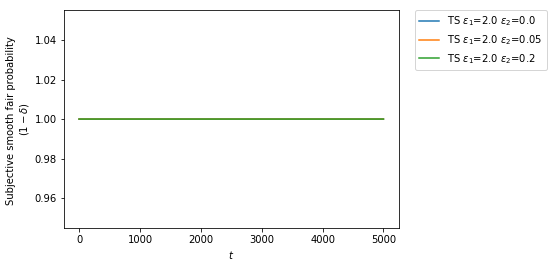

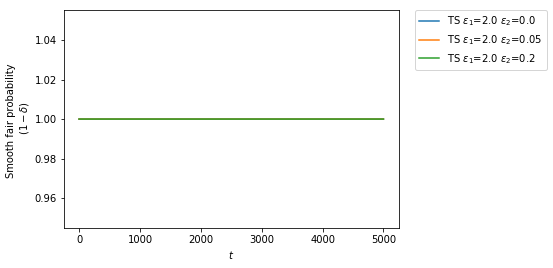

In [3]:
ts_test = []
sd_ts_test = []
fair_sd_ts_test = []

for file in os.listdir("/Users/antonm/PycharmProjects/Fairness_in_Bandits/13_3_ts_sd/5000"):
    if file.endswith(".file"):
        with open(os.path.join("/Users/antonm/PycharmProjects/Fairness_in_Bandits/13_3_ts_sd/5000", file), "rb") as f:
            test = pickle.load(f) 
            if test.T == T and test.n_iter == n_iter and test.bandits.data_set_name == 'Data0':
                print test.bandits.get_max_D()
                print test.bandits.get_mean()
                print test.bandits.data_set_name
                if test.name == 'TS':
                    ts_test.append(test)
                    print "asd"
                elif test.name == 'SD  TS' or test.name == 'SD TS':
                    sd_ts_test.append(test)
                    print "asasdd"

                elif test.name == 'Fair SD TS':
                    fair_sd_ts_test.append(test)
                else:
                    print 'unknwown test name'
plot_delta_subjective_fair(sd_ts_test + ts_test)
plot_delta_smooth_fair(sd_ts_test + ts_test)

0.0077
[ 0.4994  0.5002  0.5039  0.5058  0.5071]
Data3
asd
0.0077
[ 0.4994  0.5002  0.5039  0.5058  0.5071]
Data3
asasdd


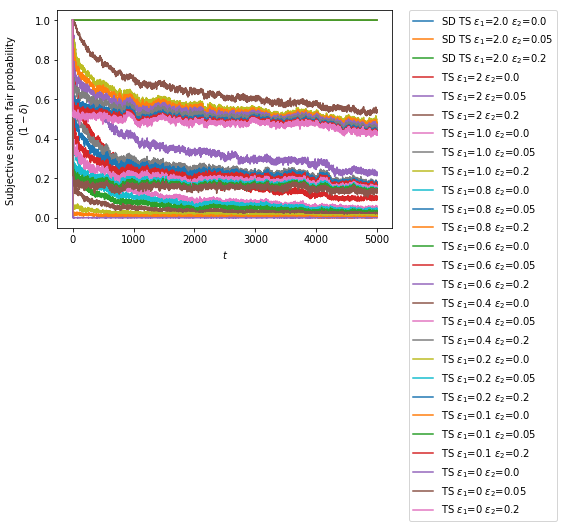

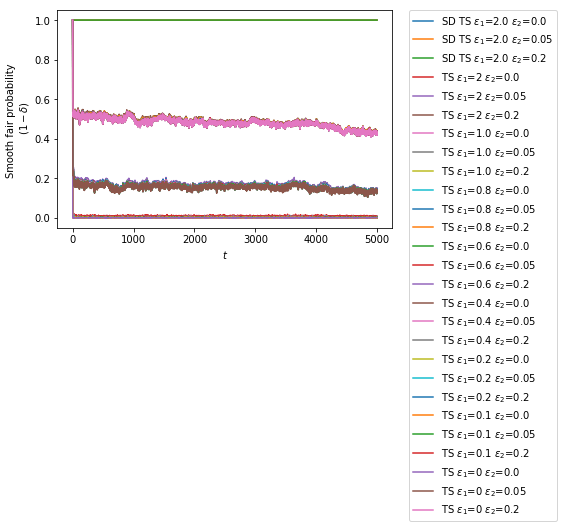

In [4]:
ts_test = []
sd_ts_test = []
fair_sd_ts_test = []

for file in os.listdir("/Users/antonm/PycharmProjects/Fairness_in_Bandits/13_3_ts_sd/5000"):
    if file.endswith(".file"):
        with open(os.path.join("/Users/antonm/PycharmProjects/Fairness_in_Bandits/13_3_ts_sd/5000", file), "rb") as f:
            test = pickle.load(f) 
            if test.T == T and test.n_iter == n_iter and test.bandits.data_set_name == 'Data3':
                print test.bandits.get_max_D()
                print test.bandits.get_mean()
                print test.bandits.data_set_name
                if test.name == 'TS':
                    ts_test.append(test)
                    print "asd"
                elif test.name == 'SD  TS' or test.name == 'SD TS':
                    sd_ts_test.append(test)
                    print "asasdd"

                elif test.name == 'Fair SD TS':
                    fair_sd_ts_test.append(test)
                else:
                    print 'unknwown test name'
plot_delta_subjective_fair(sd_ts_test + ts_test)
plot_delta_smooth_fair(sd_ts_test + ts_test)


0.190604402513
[ 0.91883455  0.77615216  0.87667304  0.89201878  0.96675656]
bar_exam
asd
0.190604402513
[ 0.91883455  0.77615216  0.87667304  0.89201878  0.96675656]
bar_exam
asasdd


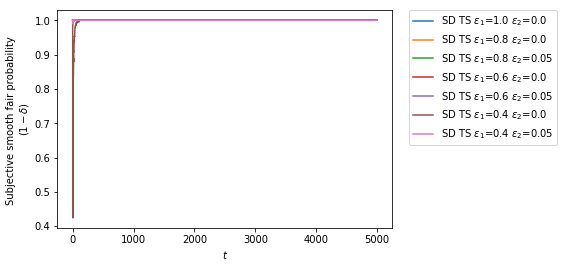

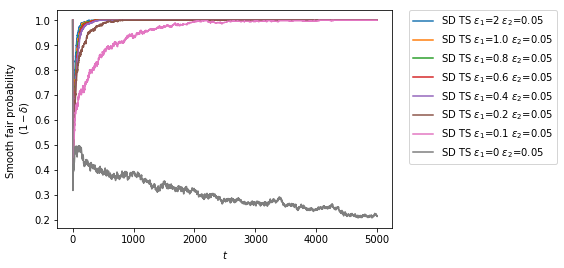

In [18]:
ts_test = []
sd_ts_test = []
fair_sd_ts_test = []

for file in os.listdir("/Users/antonm/PycharmProjects/Fairness_in_Bandits/13_3_ts_sd/5000"):
    if file.endswith(".file"):
        with open(os.path.join("/Users/antonm/PycharmProjects/Fairness_in_Bandits/13_3_ts_sd/5000", file), "rb") as f:
            test = pickle.load(f) 
            if test.T == T and test.n_iter == n_iter and test.bandits.data_set_name == 'bar_exam':
                print test.bandits.get_max_D()
                print test.bandits.get_mean()
                print test.bandits.data_set_name
                if test.name == 'TS':
                    ts_test.append(test)
                    print "asd"
                elif test.name == 'SD  TS' or test.name == 'SD TS':
                    sd_ts_test.append(test)
                    print "asasdd"

                elif test.name == 'Fair SD TS':
                    fair_sd_ts_test.append(test)
                else:
                    print 'unknwown test name'
plot_delta_subjective_fair(sd_ts_test)# + ts_test)
plot_delta_smooth_fair(sd_ts_test)# + ts_test)

1.0
[ 0.0011  0.      1.      0.9703  0.9633]
Data0
asd


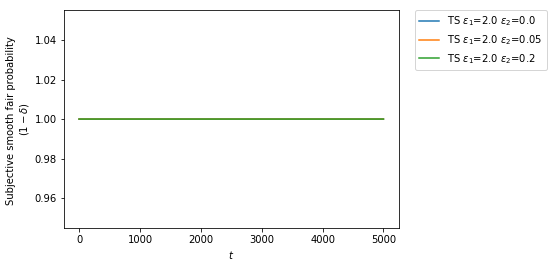

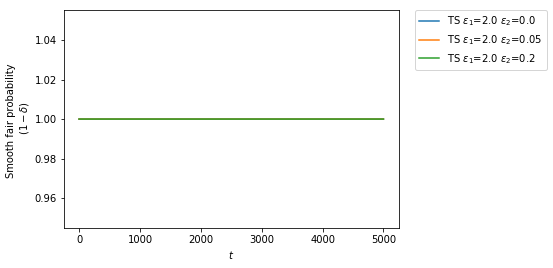

In [6]:
ts_test = []
sd_ts_test = []
fair_sd_ts_test = []

for file in os.listdir("/Users/antonm/PycharmProjects/Fairness_in_Bandits/13_3_ts_sd/5000"):
    if file.endswith(".file"):
        with open(os.path.join("/Users/antonm/PycharmProjects/Fairness_in_Bandits/13_3_ts_sd/5000", file), "rb") as f:
            test = pickle.load(f) 
            if test.T == T and test.n_iter == n_iter and test.bandits.data_set_name == 'Data0':
                print test.bandits.get_max_D()
                print test.bandits.get_mean()
                print test.bandits.data_set_name
                if test.name == 'TS':
                    ts_test.append(test)
                    print "asd"
                elif test.name == 'SD  TS' or test.name == 'SD TS':
                    sd_ts_test.append(test)
                    print "asasdd"

                elif test.name == 'Fair SD TS':
                    fair_sd_ts_test.append(test)
                else:
                    print 'unknwown test name'
plot_delta_subjective_fair(sd_ts_test + ts_test)
plot_delta_smooth_fair(sd_ts_test + ts_test)

